Import modules

In [2]:
import pandas as pd
import sklearn.preprocessing as sklpre
import sklearn.model_selection as sklms
import matplotlib.pyplot as plt
import numpy as np


Import data, and make initial plots

In [3]:
# load data

np.random.seed(3) 


df = pd.read_csv("winequality-white.csv", sep=";")
X = df.drop("quality", axis=1)
y = df["quality"]

# stratified split
X_train, X_test, y_train, y_test = sklms.train_test_split(
    X, y, stratify=y, test_size=0.33
)


Plot targets

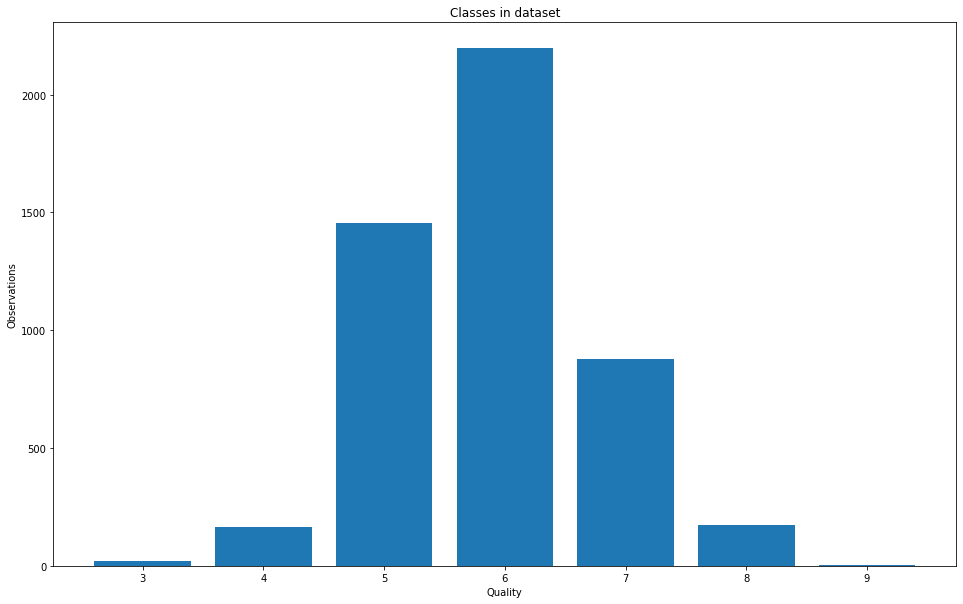

In [4]:

fig, ax = plt.subplots(figsize=(10 * 1.618, 10))
plt.bar([3,4,5,6,7,8,9],y.value_counts().sort_index().values)
plt.xlabel("Quality")
plt.ylabel("Observations")
plt.title("Classes in dataset")
plt.savefig("../Results/hist_y_train.pdf")
plt.show()

Bar plot for targets in training data

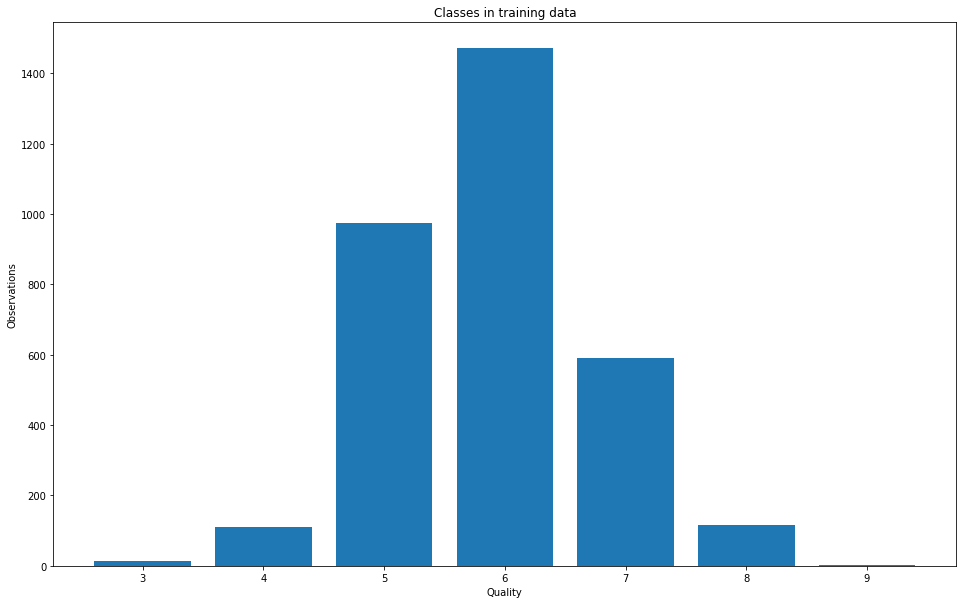

In [5]:

fig, ax = plt.subplots(figsize=(10 * 1.618, 10))
plt.bar([3,4,5,6,7,8,9],y_train.value_counts().sort_index().values)
plt.xlabel("Quality")
plt.ylabel("Observations")
plt.title("Classes in training data")
plt.savefig("../Results/hist_y_train.pdf")
plt.show()

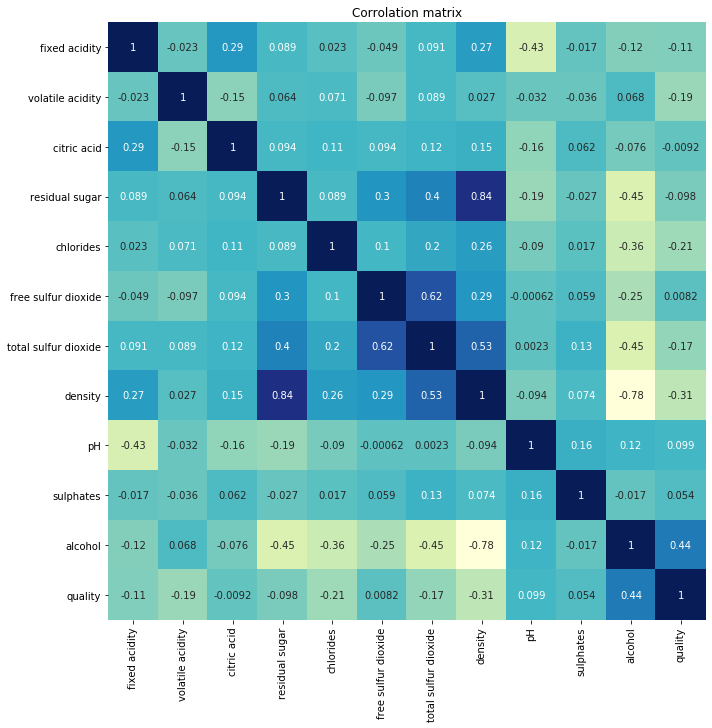

In [6]:
import seaborn as sns

n_features = np.shape(df)[1]
# Plotting correlation matrix
fig, ax = plt.subplots(figsize=(10 * 1.618, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", ax=ax, square=True, annot=True, cbar=False)
ax.set_ylim([n_features, 0])
ax.set_xlim([0, n_features])
fig.tight_layout()
plt.title("Corrolation matrix")
plt.savefig("../Results/corrolation_X.pdf")

Pre-process data

In [7]:
# pre-process data
scaler = sklpre.MinMaxScaler()  # alternative: StandardScaler()
encoder = sklpre.OneHotEncoder(categories="auto", sparse=False)  # onehot-encoder

# Scale design matrix (no categorical)
X_train = pd.DataFrame(
    scaler.fit_transform(X_train.to_numpy()), columns=X_train.columns
)  # to_numpy not needed?

X_test = pd.DataFrame(
    scaler.fit_transform(X_test.to_numpy()), columns=X_test.columns
)  # to_numpy not needed?

y_train =y_train = pd.DataFrame(
    encoder.fit_transform(y_train.to_numpy().reshape(-1, 1)),
    columns=encoder.categories_,
)

y_test = pd.DataFrame(
    encoder.fit_transform(y_test.to_numpy().reshape(-1, 1)), columns=encoder.categories_
)



Define model for grid search

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


def wine_model_NN(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation=params['activation']))
    
    model.add(Dropout(params['dropout']))

    
    model.add(Dense(output_dim=np.shape(y_train)[1], activation="softmax"))  # ouput layer
    
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'],
                  metrics=['acc', talos.utils.metrics.f1score])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        callbacks=[talos.utils.live()],
                        epochs=params['epochs'],
                        verbose=0)

    return history, model

Using TensorFlow backend.


Define parameters for gridserach

In [9]:
p = {'activation':['relu'],
     'optimizer': ['Adam'],
     'losses': ['categorical_crossentropy'],
     'first_neuron': [10,9,8],
     'dropout': [.2, .3, .4],
     'batch_size': [20, 30],
     'epochs': [5]}

Make scan

In [15]:
import talos
scan_object = talos.Scan(x=X_train,
                         y=y_train, 
                         params=p,
                         model=wine_model_NN,
                         experiment_name='OKOKOK')


KeyError: "None of [Int64Index([2990,  542, 1102, 1734, 2382,  910, 1735,  391,  834, 2344,\n            ...\n            2397, 1134,  838, 2371,  379, 1834,  846, 2352, 1393,  686],\n           dtype='int64', length=3281)] are in the [columns]"

3    4    5    6    7    8    9
0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
1     0.0  0.0  0.0  0.0  0.0  1.0  0.0
2     0.0  0.0  0.0  0.0  1.0  0.0  0.0
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...
1612  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1613  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1614  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1615  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1616  0.0  0.0  1.0  0.0  0.0  0.0  0.0

[1617 rows x 7 columns]

In [39]:
def create_model(
    nl1=0,
    nl2=1,
    nl3=0,
    nn1=12,
    nn2=11,
    nn3=10,
    lr=0.01,
    decay=0.0,
    l1=0.01,
    l2=0.01,
    act="relu",
    dropout=0,
    input_shape=11,
    output_shape=7, #synes jo ikke på putput!
):
    # set optimizer
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, decay=decay) #decay?
    # set regularizers
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)

    model = Sequential()
    model.add(
        Dense(nn1, input_dim=input_shape, activation=act, kernel_regularizer=reg) #dropout her?
    )  # first layer
    if dropout != 0:
        model.add(Dropout(dropout))
    for i in range(nl1):  # add up to nl1 layers with nn1 nodes
        model.add(Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout != 0:
            model.add(Dropout(dropout)) #hva er egentlig dropout? Hvor lav terskel for å fjerne nevroner?

    for i in range(nl2):  # add up to nl2 layers with nn2 nodes
        model.add(Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout != 0:
            model.add(Dropout(dropout))

    for i in range(nl3):  # add up to nl3 layers with nn3 nodes
        model.add(Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout != 0:
            model.add(Dropout(dropout)) #dropout her?
 a mix of multilabel-indicator and multiclass targets
    model.add(Dense(output_shape, activation="softmax"))  # ouput layer
    if dropout != 0:
        model.add(Dropout(dropout))
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    """remember to change metric.
    What is the function of metrics in compile, other than being metric for ex randomizedsearch if no metric is specified?
    dropout on first and last layer?
    """
    return model


In [46]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)

model.fit(X_train.values, y_train.values)
ypred=model.predict_proba(X_train.values, verbose=1) 
print(ypred)
print(y_train)
print(np.shape(ypred),np.shape(y_train))

Epoch 1/10
3281/3281 [==============================] - 0s 107us/step - loss: 1.4352 - accuracy: 0.4404
Epoch 2/10
3281/3281 [==============================] - 0s 80us/step - loss: 1.3056 - accuracy: 0.4486
Epoch 3/10
3281/3281 [==============================] - 0s 76us/step - loss: 1.2999 - accuracy: 0.4486
Epoch 4/10
3281/3281 [==============================] - 0s 82us/step - loss: 1.3005 - accuracy: 0.4486
Epoch 5/10
3281/3281 [==============================] - 0s 83us/step - loss: 1.2991 - accuracy: 0.4486
Epoch 6/10
3281/3281 [==============================] - 0s 80us/step - loss: 1.2988 - accuracy: 0.4435
Epoch 7/10
3281/3281 [==============================] - 0s 79us/step - loss: 1.2994 - accuracy: 0.4486
Epoch 8/10
3281/3281 [==============================] - 0s 80us/step - loss: 1.2992 - accuracy: 0.4486
Epoch 9/10
3281/3281 [==============================] - 0s 82us/step - loss: 1.2975 - accuracy: 0.4486
Epoch 10/10
3281/3281 [==============================] - 0s 21us/step
[[

In [47]:
# learning rate
lr = [1e-2, 1e-3]  # , 1e-4]
# deacy ???
decay = [1e-6, 1e-9]  # ,0]

# activation
activation = ["relu", "sigmoid"]

# numbers of layers
nl1 = [0, 1]  # ,2]
nl2 = [0, 1]  # ,2]
nl3 = [0]  # ,1]#,2]

# neurons in each layer
nn1 = [12]  # ,8]#,20]
nn2 = [11]  # ,8]#,14]
nn3 = [10, 6]  # ,9]

# dropout and regularisation
dropout = [0, 0.1, 0.2, 0.3]
l1 = [0, 0.01, 0.003, 0.001, 0.0001]
l2 = [0, 0.01, 0.003, 0.001, 0.0001]

dropout = [0.1, 0.2]
l1 = [0]  # ,0.1]
l2 = [0]  # ,0.1]
# dictionary summary

param_grid = dict(
    nl1=nl1,
    nl2=nl2,
    nl3=nl3,
    nn1=nn1,
    nn2=nn2,
    nn3=nn3,
    act=activation,
    l1=l1,
    l2=l2,
    lr=lr,
    decay=decay,
    dropout=dropout,
)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[3 3 3 ... 4 3 3]


In [71]:
grid = sklms.RandomizedSearchCV(
    estimator=model,
    cv=sklms.KFold(3),
    param_distributions=param_grid,
    verbose=1,
    n_iter=10,
    n_jobs=-1,
    scoring="f1_weighted"
)  # scoring='f1_weighted') - default uses estimator scoring
grid_result = grid.fit(X_train.values, np.argmax(y_train.values,axis=1))
cv_results_df = pd.DataFrame(grid_result.cv_results_)
cv_results_df.to_csv("gridsearch.csv")

best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

print("Best fit params:", best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.2s finished


Epoch 1/10
3281/3281 [==============================] - 0s 140us/step - loss: 2.6298 - accuracy: 0.4206
Epoch 2/10
3281/3281 [==============================] - 0s 99us/step - loss: 2.5663 - accuracy: 0.4599
Epoch 3/10
3281/3281 [==============================] - 0s 105us/step - loss: 2.6628 - accuracy: 0.4742
Epoch 4/10
3281/3281 [==============================] - 0s 110us/step - loss: 2.6679 - accuracy: 0.4736
Epoch 5/10
3281/3281 [==============================] - 0s 100us/step - loss: 2.6049 - accuracy: 0.4773
Epoch 6/10
3281/3281 [==============================] - 0s 99us/step - loss: 2.7190 - accuracy: 0.4782
Epoch 7/10
3281/3281 [==============================] - 0s 109us/step - loss: 2.4992 - accuracy: 0.4749
Epoch 8/10
3281/3281 [==============================] - 0s 111us/step - loss: 2.7483 - accuracy: 0.4797
Epoch 9/10
3281/3281 [==============================] - 0s 104us/step - loss: 2.6128 - accuracy: 0.4819
Epoch 10/10
3281/3281 [==============================] - 0s 111us/

In [75]:
ypred=best_model.predict(X_test)

1617/1617 [==============================] - 0s 29us/step


In [76]:
ypred

array([4, 3, 3, ..., 3, 3, 2])